In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path

from matplotlib import pyplot as plt
import numpy as np
import yaml

from contact_graspnet.dataloading import YCBSimulationData
from contact_graspnet.utils.visualization import mlab_pose_vis
from contact_graspnet.utils.export import Exporter
from contact_graspnet.utils.misc import get_root_dir, setup_tensorflow
from contact_graspnet.utils.config import module_from_config 

2023-02-19 17:18:19.939436: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-19 17:18:21.196960: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/moritz/catkin_ws/devel/lib:/opt/ros/noetic/lib:/home/moritz/.mujoco/mujoco210/bin:/home/moritz/mambaforge/envs/contact/lib/:/home/moritz/mambaforge/envs/contact/lib/
2023-02-19 17:18:21.197193: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No

In [2]:
setup_tensorflow()

In [3]:
dataset_path = Path.home() / "Documents" / "ycb_sim_data_1"
config_path = get_root_dir() / "configs" / "default_ycb_inference.yaml"

052_dice


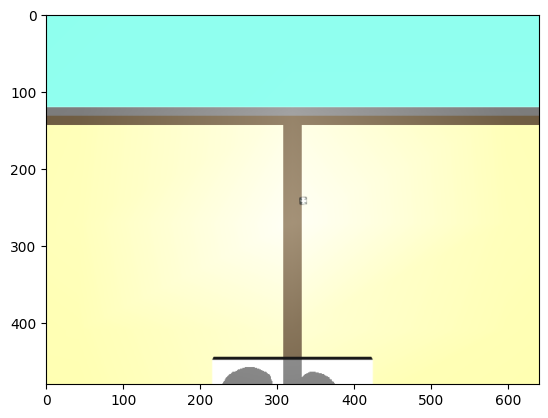

In [4]:
dataset = YCBSimulationData(dataset_path)
sample = dataset[46]

print(sample.name)

plt.imshow(sample.rgb)

In [5]:
with open(config_path, "r") as f:
    config = yaml.safe_load(f)

preprocessor = module_from_config(config["preprocessor"])
model = module_from_config(config["model"])
postprocessor = module_from_config(config["postprocessor"])

/home/moritz/Documents/ContactGraspnetBenchmark/contact_graspnet/orig/pointnet2/tf_ops/sampling
--- Get model


/home/moritz/Documents/ContactGraspnetBenchmark/contact_graspnet/orig/pointnet2/utils/tf_util.py:571: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  momentum=bn_decay, axis=axis, name=scope,


('loading ', '/home/moritz/Documents/ContactGraspnetBenchmark/contact_graspnet/checkpoints/scene_test_2048_bs3_hor_sigma_001/model.ckpt-54054')


In [9]:
pointcloud = preprocessor(sample)

network_output = (pred_grasps_cam, scores, contact_pts, widths) = model(pointcloud)

grasps_cam = postprocessor(network_output)

Generated 1 grasps


In [10]:
mlab_pose_vis(
    pointcloud,
    grasps_cam,
    preprocessor.intermediate_results["pointcloud_colors"],
)